In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv1D, MaxPooling1D
from keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau , ModelCheckpoint
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from keras.optimizers import SGD, RMSprop

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!wget "https://github.com/Reghunaath/Indian_food_dataset/raw/master/archive%20(1).zip"

--2021-03-26 17:55:27--  https://github.com/Reghunaath/Indian_food_dataset/raw/master/archive%20(1).zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Reghunaath/Indian_food_dataset/master/archive%20(1).zip [following]
--2021-03-26 17:55:27--  https://raw.githubusercontent.com/Reghunaath/Indian_food_dataset/master/archive%20(1).zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25693584 (25M) [application/zip]
Saving to: ‘archive (1).zip.2’

archive (1).zip.2   100%[===================>]  24.50M  52.2MB/s    in 0.5s    

2021-03-26 17:55:28 (52.2 MB/s) - ‘archive (1).zip.2’ saved [25693584/256

In [ ]:
!unzip "/content/archive (1).zip"

Archive:  /content/archive (1).zip
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.csv                
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.csv               


In [ ]:
test = pd.read_csv("/content/test.csv")
df = pd.read_csv("/content/train.csv")

In [ ]:
print(df.shape , test.shape)

(7352, 563) (2947, 563)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df.iloc[:,0:562])
mat_train = scaler.transform(df.iloc[:,0:562])
print(mat_train)

[[0.64429225 0.48985291 0.43354743 ... 0.79825103 0.47068654 0.        ]
 [0.63920942 0.49179472 0.4382399  ... 0.79848665 0.47284164 0.        ]
 [0.63982653 0.49026642 0.44326915 ... 0.79872236 0.47544109 0.        ]
 ...
 [0.63669369 0.49149469 0.47748909 ... 0.84506893 0.52040559 1.        ]
 [0.64482708 0.49057848 0.42085971 ... 0.84323381 0.51266974 1.        ]
 [0.67575173 0.49378844 0.39806642 ... 0.84348837 0.51834742 1.        ]]


In [ ]:
scaler = MinMaxScaler()
scaler.fit(test.iloc[:,0:562])
mat_test = scaler.transform(test.iloc[:,0:562])
print(mat_test)

[[0.6718788  0.55764282 0.52464834 ... 0.62209457 0.46362736 0.        ]
 [0.69470427 0.57426358 0.42707858 ... 0.62446791 0.45014396 0.        ]
 [0.68636345 0.55310221 0.42794829 ... 0.62380956 0.45251181 0.        ]
 ...
 [0.74529355 0.64526771 0.43015674 ... 0.62088108 0.58803909 1.        ]
 [0.65638384 0.62620241 0.44817885 ... 0.61581385 0.59135763 1.        ]
 [0.58994885 0.56560474 0.41032069 ... 0.61537208 0.59163879 1.        ]]


In [ ]:
temp = []
for i in df.Activity:
    if i == "WALKING": temp.append(3)
    if i == "WALKING_UPSTAIRS": temp.append(5)
    if i == "WALKING_DOWNSTAIRS": temp.append(4)
    if i == "SITTING": temp.append(1)
    if i == "STANDING": temp.append(2)
    if i == "LAYING": temp.append(0)
df["n_Activity"] = temp

In [ ]:
temp = []
for i in test.Activity:
    if i == "WALKING": temp.append(3)
    if i == "WALKING_UPSTAIRS": temp.append(5)
    if i == "WALKING_DOWNSTAIRS": temp.append(4)
    if i == "SITTING": temp.append(1)
    if i == "STANDING": temp.append(2)
    if i == "LAYING": temp.append(0)
test["n_Activity"] = temp

In [ ]:
df.drop(["Activity"] , axis = 1 , inplace = True)

In [ ]:
test.drop(["Activity"] , axis = 1 , inplace = True)

In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(df.n_Activity , num_classes=6)
y_test = to_categorical(test.n_Activity , num_classes=6)

In [ ]:
integer_y_test = test.n_Activity

In [ ]:
X_train = mat_train 
X_test = mat_test

In [ ]:
print(X_train.shape , y_train.shape)
print(X_test.shape , y_test.shape)

(7352, 562) (7352, 6)
(2947, 562) (2947, 6)


In [ ]:
filepath="HAR_weights.hdf5"
from keras.callbacks import ReduceLROnPlateau , ModelCheckpoint

lr_reduce = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, epsilon=0.0001, patience=1, verbose=1)
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [ ]:
class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('val_accuracy') > 0.93):   
          print("\nReached %2.2f%% accuracy, so stopping training!!" %(93))   
          self.model.stop_training = True
callback = myCallback()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout , BatchNormalization
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.optimizers import RMSprop, Adam

In [ ]:
model = Sequential()

model.add(Dense(64, input_dim=X_train.shape[1] , activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dense(196, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(6, activation='sigmoid'))

model.compile(optimizer = Adam(lr = 0.001),loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 64)                36032     
_________________________________________________________________
dense_13 (Dense)             (None, 64)                4160      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                256       
_________________________________________________________________
dense_14 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_15 (Dense)             (None, 196)               25284     
_________________________________________________________________
dense_16 (Dense)             (None, 32)                6304      
_________________________________________________________________
dense_17 (Dense)             (None, 6)                

In [ ]:
model.fit(X_train, y_train , epochs=200 , batch_size = 128 , validation_data=(X_test, y_test) , callbacks=[callback,checkpoint])

Epoch 1/200
58/58 [==============================] - 1s 10ms/step - loss: 0.8155 - accuracy: 0.6973 - val_loss: 0.8375 - val_accuracy: 0.5755

Epoch 00001: val_accuracy improved from -inf to 0.57550, saving model to HAR_weights.hdf5
Epoch 2/200
58/58 [==============================] - 0s 6ms/step - loss: 0.1339 - accuracy: 0.9436 - val_loss: 0.6821 - val_accuracy: 0.7180

Epoch 00002: val_accuracy improved from 0.57550 to 0.71802, saving model to HAR_weights.hdf5
Epoch 3/200
58/58 [==============================] - 0s 6ms/step - loss: 0.1028 - accuracy: 0.9603 - val_loss: 0.5160 - val_accuracy: 0.7743

Epoch 00003: val_accuracy improved from 0.71802 to 0.77435, saving model to HAR_weights.hdf5
Epoch 4/200
58/58 [==============================] - 0s 6ms/step - loss: 0.0859 - accuracy: 0.9652 - val_loss: 0.3076 - val_accuracy: 0.8602

Epoch 00004: val_accuracy improved from 0.77435 to 0.86020, saving model to HAR_weights.hdf5
Epoch 5/200
58/58 [==============================] - 0s 6ms/st

In [ ]:
model.save("NN93.48.h5")

In [ ]:
model.evaluate(X_test, y_test)

93/93 [==============================] - 0s 1ms/step - loss: 0.3477 - accuracy: 0.9338


[0.34773972630500793, 0.9338310360908508]

In [ ]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
# y_pred.shape
classification_report(integer_y_test, np.argmax(y_pred, axis = 1), output_dict=True)

{'0': {'f1-score': 0.9916897506925207,
  'precision': 0.9835164835164835,
  'recall': 1.0,
  'support': 537},
 '1': {'f1-score': 0.918974358974359,
  'precision': 0.9256198347107438,
  'recall': 0.9124236252545825,
  'support': 491},
 '2': {'f1-score': 0.9283018867924527,
  'precision': 0.9318181818181818,
  'recall': 0.924812030075188,
  'support': 532},
 '3': {'f1-score': 0.9172113289760349,
  'precision': 0.9976303317535545,
  'recall': 0.8487903225806451,
  'support': 496},
 '4': {'f1-score': 0.9480198019801981,
  'precision': 0.9871134020618557,
  'recall': 0.9119047619047619,
  'support': 420},
 '5': {'f1-score': 0.8971428571428571,
  'precision': 0.8134715025906736,
  'recall': 1.0,
  'support': 471},
 'accuracy': 0.9338310145911096,
 'macro avg': {'f1-score': 0.9335566640930703,
  'precision': 0.9398616227419155,
  'recall': 0.9329884566358629,
  'support': 2947},
 'weighted avg': {'f1-score': 0.9342619042653412,
  'precision': 0.9402484948607224,
  'recall': 0.9338310145911096

In [ ]:
test = pd.read_csv("/content/test.csv")
train = pd.read_csv("/content/train.csv")
X_train = train.iloc[:, : -2]
y_train = train.iloc[:, 562:563]
X_test = test.iloc[:, : -2]
y_test = test.iloc[:, 562:563]
label_encoder = LabelEncoder()
integer_y_train = label_encoder.fit_transform(y_train)
integer_y_test = label_encoder.transform(y_test)
one_hot_y_train = to_categorical(integer_y_train, 6)
one_hot_y_test = to_categorical(integer_y_test, 6)
X_train = np.expand_dims(X_train,axis=1)
X_test = np.expand_dims(X_test,axis=1)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


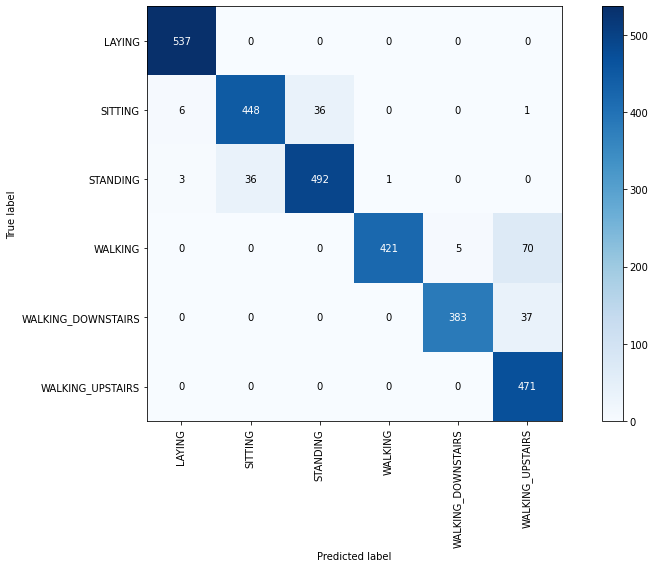

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm,lables):
    fig, ax = plt.subplots(figsize=(12,8)) # for plotting confusion matrix as image
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
    yticks=np.arange(cm.shape[0]),
    xticklabels=lables, yticklabels=lables,
    ylabel='True label',
    xlabel='Predicted label')
    plt.xticks(rotation = 90)
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, int(cm[i, j]),ha="center", va="center",color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
integer_y_pred = np.argmax(y_pred, axis = 1)
string_y_pred = label_encoder.inverse_transform(integer_y_pred)
cm = confusion_matrix(y_test,string_y_pred)
plot_confusion_matrix(cm, np.unique(string_y_pred)) 

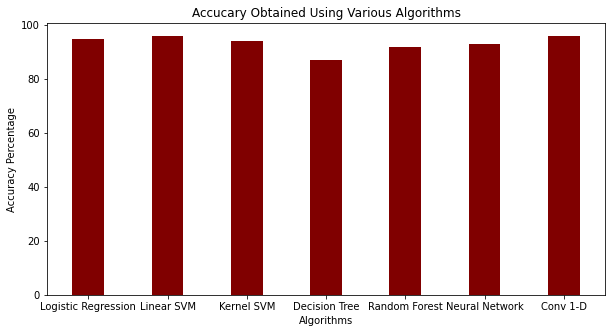

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 


 
data = {'Logistic Regression':95, 'Linear SVM': 96, 'Kernel SVM': 94,'Decision Tree': 87, 'Random Forest': 92, 'Neural Network': 93,  "Conv 1-D": 96} 
courses = list(data.keys()) 
values = list(data.values()) 

fig = plt.figure(figsize = (10, 5)) 


plt.bar(courses, values, color ='maroon', width = 0.4) 

plt.xlabel("Algorithms") 
plt.ylabel("Accuracy Percentage") 
plt.title("Accucary Obtained Using Various Algorithms") 
plt.show() 